<center><h1>Hong_Seungil_HW8</h1></center>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [27]:
# Data read
df_raw = pd.read_csv('..\data\wdbc.data', header=None)

In [28]:
df_raw

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [34]:
df_X = df_raw.iloc[ :, 2:]
df_y = df_raw.iloc[:, 1:2]

In [48]:
# List of base feature names
base_features = [
    "radius", "texture", "perimeter", "area", 
    "smoothness", "compactness", "concavity", 
    "concave points", "symmetry", "fractal dimension"
]

# Creating new column names
new_column_names = []
for category in ['mean', 'SE', 'worst']:
    new_column_names.extend([f"{feature}-{category}" for feature in base_features])

# Assigning the new column names to the DataFrame
df_X.columns = new_column_names
df_y.columns = ['Diagnosis']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42, stratify=df_y)


In [50]:
X_train

,radius-mean,texture-mean,perimeter-mean,area-mean,smoothness-mean,compactness-mean,concavity-mean,concave points-mean,symmetry-mean,fractal dimension-mean,...,radius-worst,texture-worst,perimeter-worst,area-worst,smoothness-worst,compactness-worst,concavity-worst,concave points-worst,symmetry-worst,fractal dimension-worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [51]:
X_test

,radius-mean,texture-mean,perimeter-mean,area-mean,smoothness-mean,compactness-mean,concavity-mean,concave points-mean,symmetry-mean,fractal dimension-mean,...,radius-worst,texture-worst,perimeter-worst,area-worst,smoothness-worst,compactness-worst,concavity-worst,concave points-worst,symmetry-worst,fractal dimension-worst
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740


In [52]:
y_train

,Diagnosis
10,M
170,B
407,B
430,M
27,M
...,...
37,B
415,B
458,B
476,B


In [53]:
y_test

,Diagnosis
120,B
250,M
375,B
99,M
455,B
...,...
381,B
534,B
448,B
205,M


### (b) Monte-Carlo Simulation

#### (i) Supervised Learning

In [78]:
# 1. Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# 2. Set up the L1-penalized SVM with GridSearchCV for 5-fold cross-validation
svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(svm, param_grid, cv=5)

# 3. Train the model
grid_search.fit(X_train_scaled, y_train)

# Best penalty parameter and model score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print("Best C: ", best_C)
print("Best Score: ", best_score)

Best C:  0.1
Best Score:  0.9714285714285715


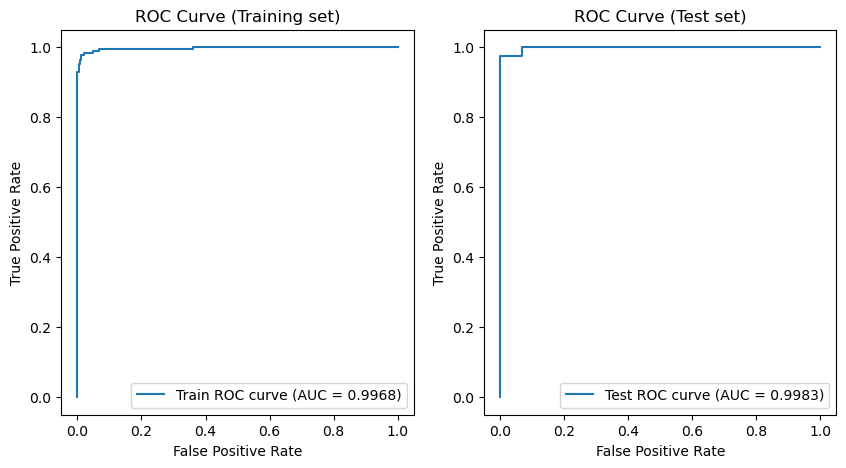

In [88]:
# Initialize lists to store metrics
accuracies_train, accuracies_test = [], []
precisions_train, precisions_test = [], []
recalls_train, recalls_test = [], []
f1s_train, f1s_test = [], []
aucs_train, aucs_test = [], []

pos_label = 'M'

for i in range(30):
    # Train the model
    model = LinearSVC(penalty='l1', C=best_C, dual=False, max_iter=10000)
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)  # Assuming X_test is already scaled

    # Calculate metrics for training set
    accuracies_train.append(accuracy_score(y_train, y_train_pred))
    precisions_train.append(precision_score(y_train, y_train_pred, pos_label=pos_label))
    recalls_train.append(recall_score(y_train, y_train_pred, pos_label=pos_label))
    f1s_train.append(f1_score(y_train, y_train_pred, pos_label=pos_label))
    aucs_train.append(roc_auc_score(y_train, model.decision_function(X_train_scaled)))

    # Calculate metrics for test set
    accuracies_test.append(accuracy_score(y_test, y_test_pred))
    precisions_test.append(precision_score(y_test, y_test_pred, pos_label=pos_label))
    recalls_test.append(recall_score(y_test, y_test_pred, pos_label=pos_label))
    f1s_test.append(f1_score(y_test, y_test_pred, pos_label=pos_label))
    aucs_test.append(roc_auc_score(y_test, model.decision_function(X_test_scaled)))

# Calculate average of the metrics
avg_accuracy_train, avg_accuracy_test = np.mean(accuracies_train), np.mean(accuracies_test)
avg_precision_train, avg_precision_test = np.mean(precisions_train), np.mean(precisions_test)
avg_recall_train, avg_recall_test = np.mean(recalls_train), np.mean(recalls_test)
avg_f1_train, avg_f1_test = np.mean(f1s_train), np.mean(f1s_test)
avg_auc_train, avg_auc_test = np.mean(aucs_train), np.mean(aucs_test)

# Plot ROC Curve for the last run
fpr_train, tpr_train, _ = roc_curve(y_train, model.decision_function(X_train_scaled), pos_label=pos_label)
fpr_test, tpr_test, _ = roc_curve(y_test, model.decision_function(X_test_scaled), pos_label=pos_label)

plt.figure(figsize=(10, 5))

# Plot ROC Curve for the training set
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {avg_auc_train:.4f})')
plt.title('ROC Curve (Training set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot ROC Curve for the test set
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {avg_auc_test:.4f})')
plt.title('ROC Curve (Test set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()


In [89]:
print("Average Metrics Over 30 Runs:")
print("Training Set:")
print(f"  Accuracy: {avg_accuracy_train:.4f}")
print(f"  Precision: {avg_precision_train:.4f}")
print(f"  Recall: {avg_recall_train:.4f}")
print(f"  F1-Score: {avg_f1_train:.4f}")
print(f"  AUC: {avg_auc_train:.4f}")
print("\nTesting Set:")
print(f"  Accuracy: {avg_accuracy_test:.4f}")
print(f"  Precision: {avg_precision_test:.4f}")
print(f"  Recall: {avg_recall_test:.4f}")
print(f"  F1-Score: {avg_f1_test:.4f}")
print(f"  AUC: {avg_auc_test:.4f}")

Average Metrics Over 30 Runs:
Training Set:
  Accuracy: 0.9802
  Precision: 0.9820
  Recall: 0.9647
  F1-Score: 0.9733
  AUC: 0.9968

Testing Set:
  Accuracy: 0.9825
  Precision: 0.9762
  Recall: 0.9762
  F1-Score: 0.9762
  AUC: 0.9983


In [91]:
# Confusion Matrix for the last run
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training): \n", cm_train)
print("Confusion Matrix (Testing): \n", cm_test)

Confusion Matrix (Training): 
 [[282   3]
 [  6 164]]
Confusion Matrix (Testing): 
 [[71  1]
 [ 1 41]]


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

##### (B)

#### (iii) Unsupervised Learning

##### (A)

##### (B)

#### (iv) Spectral Clustering

#### (iv) Compare

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

### (b) Repeat each of the following two procedures 50 times

#### (i) Passive

#### (ii) Active

### (c) Average the 50 test errors